## MOVIE STUDIO EDA - Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

In this project, my main areas of focus were:

1. How do production budgets affect profits?
2. Which Genres perform best both in ratings?
3. Which are the highest grossing movies?

## STEP 1: LOADING THE DATA FILES

I decided to load and inspect the data files in order to decide which files are relevant for my study. Documentation for the methods used can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [1]:
#importing the relevant packages
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the SQLite database
conn = sqlite3.connect('im.db')


In [2]:
# Loading the basics CSV with UTF-8 encoding
info = pd.read_csv('rt.movie_info.tsv.gz', compression='gzip', delimiter='\t', encoding='utf-8')

# Loading the ratings CSV with 'latin1' encoding
try:
    reviews = pd.read_csv('rt.reviews.tsv.gz', compression='gzip', delimiter='\t', encoding='utf-8')
except UnicodeDecodeError:
    reviews = pd.read_csv('rt.reviews.tsv.gz', compression='gzip', delimiter='\t', encoding='latin1')

# Loading the gross CSV with UTF-8 encoding
gross = pd.read_csv('tmdb.movies.csv.gz', compression='gzip', index_col=0, encoding='utf-8')

# Loading the budgets CSV with UTF-8 encoding
budgets = pd.read_csv('tn.movie_budgets.csv.gz', compression='gzip', index_col=0, encoding='utf-8')

budgets.head()
budgets.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


## STEP TWO: DATA CLEANING AND INSPECTION

I cleaned the data in the budgets_csv file to make it easier to work with and visualize. In this step, I clean the values in these columns by removing any dollar signs ($) and commas (,), which are common in monetary values but can cause issues if the columns are to be treated as numeric types. The str.replace method is used to remove these characters.
After cleaning the strings, the code converts the columns back to float type so that they can be used in numerical computations.

In [3]:
# Inspect column data types
print(budgets.dtypes)

# Convert columns to strings if necessary
budgets['production_budget'] = budgets['production_budget'].astype(str)
budgets['domestic_gross'] = budgets['domestic_gross'].astype(str)
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(str)

# Clean the columns
budgets['production_budget'] = budgets['production_budget'].str.replace('[\$,]', '', regex=True).astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace('[\$,]', '', regex=True).astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('[\$,]', '', regex=True).astype(float)

# Set pandas display option for floats
pd.set_option('display.float_format', '{:,.2f}'.format)


# Print cleaned production DataFrame
print(budgets.head())

release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object
    release_date                                        movie  \
id                                                              
1   Dec 18, 2009                                       Avatar   
2   May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
3    Jun 7, 2019                                 Dark Phoenix   
4    May 1, 2015                      Avengers: Age of Ultron   
5   Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

    production_budget  domestic_gross  worldwide_gross  
id                                                      
1      425,000,000.00  760,507,625.00 2,776,345,279.00  
2      410,600,000.00  241,063,875.00 1,045,663,875.00  
3      350,000,000.00   42,762,350.00   149,762,350.00  
4      330,600,000.00  459,005,868.00 1,403,013,963.00  
5      317,000,000.00  620,181,382.00 1,316,721,

I inspected the cleaned data sets below;

In [4]:
# Getting descriptive statistics
print(budgets.describe())
print(budgets.info())


       production_budget  domestic_gross  worldwide_gross
count           5,782.00        5,782.00         5,782.00
mean       31,587,757.10   41,873,326.87    91,487,460.91
std        41,812,076.83   68,240,597.36   174,719,968.78
min             1,100.00            0.00             0.00
25%         5,000,000.00    1,429,534.50     4,125,414.75
50%        17,000,000.00   17,225,945.00    27,984,448.50
75%        40,000,000.00   52,348,661.50    97,645,836.50
max       425,000,000.00  936,662,225.00 2,776,345,279.00
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(2)
memory u

## STEP THREE: DATA VISUALIZATION

## Question 1: How do Production budgets affect profits?


I Started off by checking the NaN values, then opted to use the mean to fill the NaN values. Reason being, By filling NaN values with the mean of the column, I intend to preserve the central tendency of the data. This means that the overall distribution and characteristics of the data are less likely to be skewed compared to using other methods like filling with zeros or the median.

release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


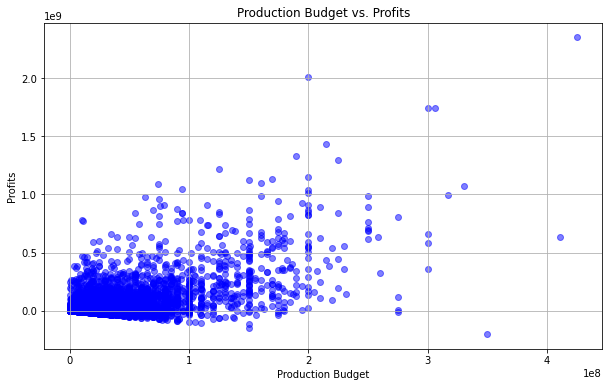

In [5]:
# Checking data types and missing values
print(budgets.dtypes)
print(budgets.isnull().sum())

# Convert 'production_budget' and 'worldwide_gross' columns to float
budgets['production_budget'] = budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Calculate profits
budgets['profit'] = budgets['worldwide_gross'] - budgets['production_budget']

# Fill NaN values in the 'profit' column with the mean of the column
budgets['profit'].fillna(budgets['profit'].mean(), inplace=True)

# Visualize production budget vs. profits
plt.figure(figsize=(10, 6))
plt.scatter(budgets['production_budget'], budgets['profit'], color='blue', alpha=0.5)
plt.xlabel('Production Budget')
plt.ylabel('Profits')
plt.title('Production Budget vs. Profits')
plt.grid(True)
plt.show()



The above plot shows a generally increasing trend from left to right, it suggests that higher production budgets are associated with higher profits. By employing good quality production techniques, Microsoft could guarantee higher returns on investment.The main assumption being that, good quality production is expensive. There is one outlier, which is The Avatar movie.

## QUESTION 2: Which Genres perform best in terms of ratings?

I referred to the pandas .numeric documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html) So that if there are any values that cannot be converted to numeric format, Pandas will replace them with NaN. The findings show that the ratings are skewed.

I started by looking at the distribution of the ratings to understand their statistical behaviour.

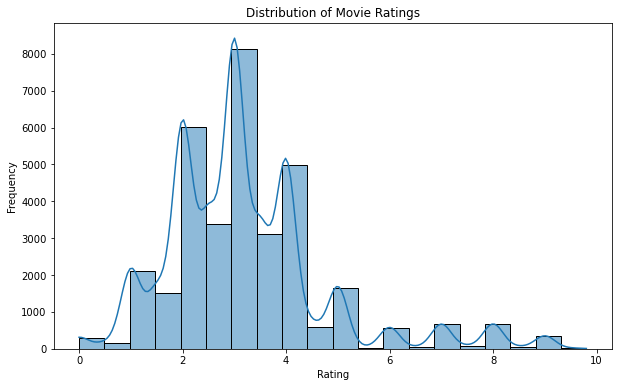

In [6]:
# Extract the numeric part of the ratings
reviews['rating'] = reviews['rating'].str.split('/').str[0]

# Convert the ratings to numeric format
reviews['rating'] = pd.to_numeric(reviews['rating'], errors='coerce')

# Drop NaN values in the 'rating' column
reviews = reviews.dropna(subset=['rating'])

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=reviews, x='rating', bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## QUESTION 2 (i): Which Genres perform best in terms of ratings?

I referred to the pandas .numeric documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html) So that if there are any values that cannot be converted to numeric format, Pandas will replace them with NaN. The ratings are skewed.

        genres                                        movie_title  \
0        Short                                         Requiescat   
1  Documentary     Exteriores: Mulheres Brasileiras na Diplomacia   
2    Game-Show                      Wait Wait Don't Tell Me Live!   
3         News                                    Of Dogs and Men   
4    Biography                          Send My Mail to Nashville   
5        Music                          Send My Mail to Nashville   
6      History  Ellis Island: The Making of a Master Race in A...   
7        Sport                                        Foosballers   
8          War                                  From Shock to Awe   
9   Reality-TV                                    Tomato Republic   

   average_rating  numvotes  
0            8.80      8.00  
1           10.00      5.00  
2            9.00      7.00  
3            9.40     12.00  
4            9.80      5.00  
5            9.80      5.00  
6           10.00      6.00  


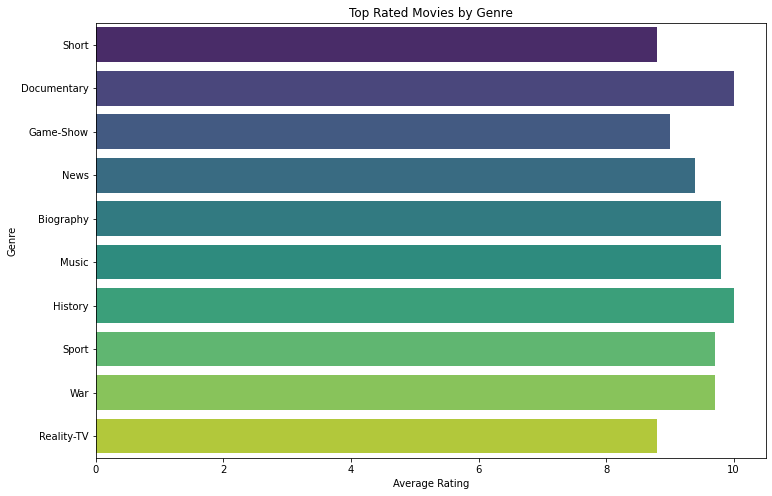

In [7]:
# Loading the SQLite database
conn  = sqlite3.connect(r'C:\Users\User\Downloads\dsc-phase-1-project-v2-4-master\dsc-phase-1-project-v2-4-master\zippedData\im.db\im.db')

# Defining the SQL query with the join operation
query = """
    SELECT b.genres,
           b.primary_title AS movie_title,
           r.averagerating AS average_rating,
           r.numvotes
    FROM movie_basics AS b
    JOIN movie_ratings AS r ON b.movie_id = r.movie_id;
"""

# Using pd.read_sql_query to pass the SQL query and connection object
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Splitting the genres into individual genres and explode the DataFrame
#
df['genres'] = df['genres'].str.split(',')
df = df.explode('genres')

# Group by genre and calculate the average rating for each genre
genre_ratings = df.groupby('genres')['average_rating'].mean().reset_index()

# Sort genres based on average rating in descending order and select the top 10
top_10_genres = genre_ratings.sort_values(by='average_rating', ascending=False).head(10)

# Initialize an empty DataFrame to store top rated movies by genre
top_rated_movies_by_genre = pd.DataFrame(columns=['genres', 'movie_title', 'average_rating'])

# For each genre in the top 10, select the top rated movie
for genre in top_10_genres['genres']:
    top_movie = df[df['genres'] == genre].nlargest(1, 'average_rating')
    top_rated_movies_by_genre = pd.concat([top_rated_movies_by_genre, top_movie])

# Reset the index of the resulting DataFrame
top_rated_movies_by_genre.reset_index(drop=True, inplace=True)

# Display the top rated movies by genre
print(top_rated_movies_by_genre)

# Visualize the top rated movies by genre
plt.figure(figsize=(12, 8))
sns.barplot(data=top_rated_movies_by_genre, x='average_rating', y='genres', palette='viridis')
plt.title('Top Rated Movies by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


## QUESTION 3: Which are the highest grossing movies?

In this section I look at the best performing movies as well as the best performing genres.

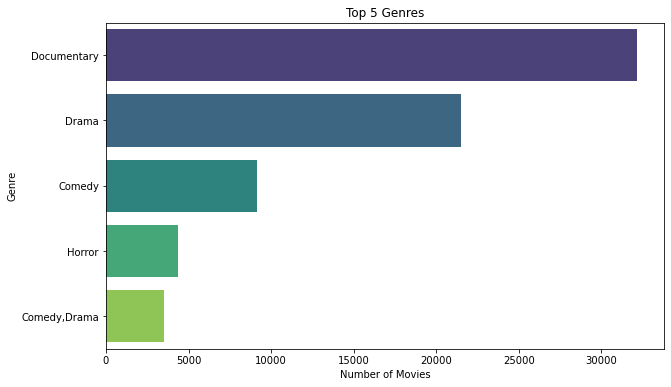

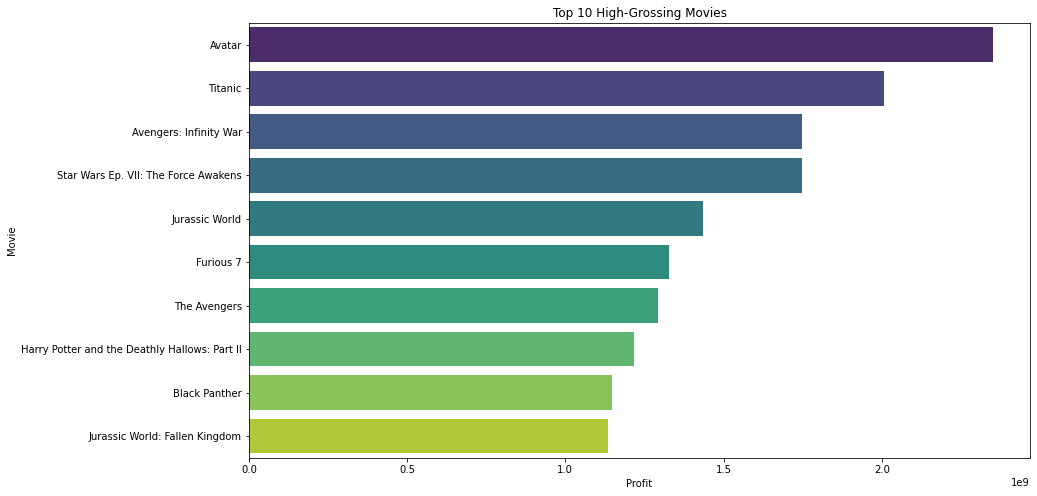

In [8]:
# Load the SQLite database
conn = sqlite3.connect(r'C:\Users\User\Downloads\dsc-phase-1-project-v2-4-master\dsc-phase-1-project-v2-4-master\zippedData\im.db\im.db')


# Load the movie_basics table
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

# Load the budgets table from the CSV file
budgets = pd.read_csv('tn.movie_budgets.csv.gz', compression='gzip', encoding='utf-8')

# Close the connection
conn.close()

# Convert budget and gross columns to numeric after removing commas and dollar signs
budgets['production_budget'] = budgets['production_budget'].str.replace('[\$,]', '', regex=True).astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('[\$,]', '', regex=True).astype(float)

# Calculating profit
budgets['profit'] = budgets['worldwide_gross'] - budgets['production_budget']

# Getting the top 5 genres
top_genres = movie_basics['genres'].value_counts().head(5).index.tolist()

# Filtering high-grossing movies
high_grossing_movies = budgets[budgets['worldwide_gross'] > budgets['production_budget']]

# Visualizing the top 5 genres
plt.figure(figsize=(10, 6))
sns.countplot(data=movie_basics[movie_basics['genres'].isin(top_genres)], y='genres', order=top_genres, palette='viridis')
plt.title('Top 5 Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# Sorting high-grossing movies by profit and select the top 10
top_10_high_grossing = high_grossing_movies.sort_values(by='profit', ascending=False).head(10)

# Visualizing the top 10 high-grossing movies
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_high_grossing, x='profit', y='movie', palette='viridis')
plt.title('Top 10 High-Grossing Movies')
plt.xlabel('Profit')
plt.ylabel('Movie')
plt.show()



## RECOMMENDATIONS

The EDA Recommends the following:

In [9]:
# Insights and Recommendations
conn = sqlite3.connect(r'C:\Users\User\Downloads\dsc-phase-1-project-v2-4-master\dsc-phase-1-project-v2-4-master\zippedData\im.db\im.db')
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
top_genres = movie_basics['genres'].value_counts().head(3).index.tolist()
high_grossing_movies = budgets[budgets['worldwide_gross'] > budgets['production_budget']]

print("Top Genres by Frequency:", top_genres)

print("\nRecommendations:")
print("1. Focus on producing movies in the following genres: ", top_genres)
print("2. Ensure a balanced budget to maximize ROI.")
print("3. Invest in marketing and quality to boost critic reviews.")

Top Genres by Frequency: ['Documentary', 'Drama', 'Comedy']

Recommendations:
1. Focus on producing movies in the following genres:  ['Documentary', 'Drama', 'Comedy']
2. Ensure a balanced budget to maximize ROI.
3. Invest in marketing and quality to boost critic reviews.


## CONCLUSION

Microsoft needs to find a balance between production quality and user appeal to ensure the success of the venture. The main assumption being good quality production is expensive and will guarantee a higher ROI.
